In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df0 = pd.read_csv('VR23_10M.txt', skiprows=4, sep='\s+')


In [14]:
df0.head()


,DD/MM/AAAA,HH:MM,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL
0,29/01/2019,14:10,257.0,298.0,0.8,1.4,13.7,66.0,867.4,0.0,193.0
1,29/01/2019,14:20,239.0,290.0,1.0,1.8,14.9,63.0,867.5,0.0,189.0
2,29/01/2019,14:30,264.0,287.0,1.2,2.0,15.9,57.0,867.6,0.0,224.0
3,29/01/2019,14:40,265.0,41.0,1.2,2.0,17.3,57.0,867.7,0.0,287.0
4,29/01/2019,14:50,0.0,0.0,0.0,0.0,19.8,48.0,867.9,0.0,323.0


In [15]:
df = pd.DataFrame(df0)

In [16]:
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
RAPVIENTO2    float64
RAPRAFAGA2    float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RAD-SOL       float64
dtype: object

In [17]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [18]:
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL,FECHA
0,29/01/2019,14:10,257.0,298.0,0.8,1.4,13.7,66.0,867.4,0.0,193.0,2019-01-29 14:10:00
1,29/01/2019,14:20,239.0,290.0,1.0,1.8,14.9,63.0,867.5,0.0,189.0,2019-01-29 14:20:00
2,29/01/2019,14:30,264.0,287.0,1.2,2.0,15.9,57.0,867.6,0.0,224.0,2019-01-29 14:30:00
3,29/01/2019,14:40,265.0,41.0,1.2,2.0,17.3,57.0,867.7,0.0,287.0,2019-01-29 14:40:00
4,29/01/2019,14:50,0.0,0.0,0.0,0.0,19.8,48.0,867.9,0.0,323.0,2019-01-29 14:50:00


In [19]:
df.describe()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000
mean,154.052632,217.842105,2.340789,5.452632,17.544737,67.565789,867.772368,0.0,330.000000
std,75.666971,56.855384,0.638577,1.504081,2.751552,17.961689,0.740738,0.0,320.449476
min,0.000000,0.000000,0.000000,0.000000,12.500000,42.000000,866.800000,0.0,-1.000000
25%,138.750000,207.750000,2.100000,5.050000,15.125000,56.750000,867.100000,0.0,17.000000
50%,156.500000,228.500000,2.400000,5.700000,18.400000,64.000000,867.650000,0.0,245.500000
75%,168.250000,243.000000,2.700000,6.325000,19.800000,75.250000,868.400000,0.0,572.500000
max,360.000000,321.000000,4.000000,8.800000,21.600000,100.000000,869.100000,0.0,1048.000000


In [21]:
df_tmp = df[df.TEMP > 14] 
df_select = df_tmp[df_tmp.TEMP < 17]
df_select

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL,FECHA
1,239.0,290.0,1.0,1.8,14.9,63.0,867.5,0.0,189.0,2019-01-29 14:20:00
2,264.0,287.0,1.2,2.0,15.9,57.0,867.6,0.0,224.0,2019-01-29 14:30:00
52,147.0,211.0,2.4,6.6,16.7,70.0,867.0,0.0,46.0,2019-01-29 22:50:00
53,145.0,261.0,2.8,5.9,16.4,69.0,867.0,0.0,49.0,2019-01-29 23:00:00
54,160.0,243.0,2.3,5.8,16.2,70.0,867.1,0.0,29.0,2019-01-29 23:10:00
55,159.0,239.0,2.3,5.8,16.0,70.0,867.1,0.0,30.0,2019-01-29 23:20:00
56,158.0,241.0,2.4,6.1,15.9,74.0,867.1,0.0,11.0,2019-01-29 23:30:00
57,150.0,241.0,2.1,6.9,15.6,79.0,867.2,0.0,17.0,2019-01-29 23:40:00
58,158.0,293.0,2.0,4.7,15.2,81.0,867.1,0.0,17.0,2019-01-29 23:50:00
59,157.0,245.0,1.9,4.3,14.9,83.0,867.1,0.0,11.0,2019-01-30 00:00:00


In [25]:
df.mean()

DIRS          154.052632
DIRR          217.842105
RAPVIENTO2      2.340789
RAPRAFAGA2      5.452632
TEMP           17.544737
HR             67.565789
PB            867.772368
PREC            0.000000
RAD-SOL       330.000000
dtype: float64

In [26]:
df.TEMP.mean()

17.544736842105266

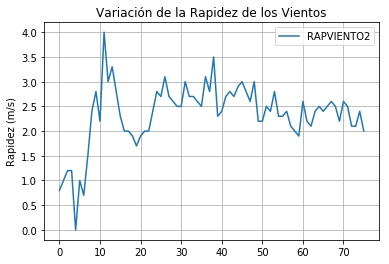

In [27]:
plt.figure(); df.RAPVIENTO2.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

In [28]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA HH:MM'], 1)

KeyError: ('HH:MM', 'occurred at index 0')

In [29]:
df.head()

,DIRS,DIRR,RAPVIENTO2,RAPRAFAGA2,TEMP,HR,PB,PREC,RAD-SOL,FECHA
0,257.0,298.0,0.8,1.4,13.7,66.0,867.4,0.0,193.0,2019-01-29 14:10:00
1,239.0,290.0,1.0,1.8,14.9,63.0,867.5,0.0,189.0,2019-01-29 14:20:00
2,264.0,287.0,1.2,2.0,15.9,57.0,867.6,0.0,224.0,2019-01-29 14:30:00
3,265.0,41.0,1.2,2.0,17.3,57.0,867.7,0.0,287.0,2019-01-29 14:40:00
4,0.0,0.0,0.0,0.0,19.8,48.0,867.9,0.0,323.0,2019-01-29 14:50:00
